### Посмотрим, как визуально выглядит Чебышевская сетка:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
j

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

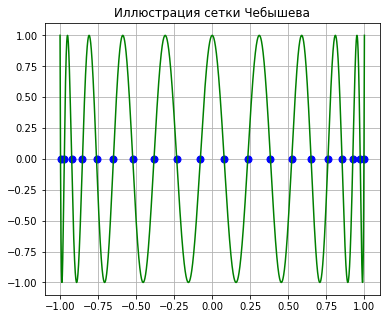

In [2]:
n = 20
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
xx = np.linspace(-1, 1, 4000)
fig, ax = plt.subplots(figsize = (6,5))
plt.plot(tn, np.zeros(n), 'bo', ms = 7)
plt.plot(xx, np.cos(n * np.arccos(xx)), 'g')
plt.title("Иллюстрация сетки Чебышева")
plt.grid()
plt.show()

Как видно, узлы Чебышевской сетки сгущаются на краях отрезка интерполяции. Это важно, как мы увидим на следующих графиках, где будет проинтерполированы две колокообразные функции (одна из них - ф-ция Рунге)

### Сравним фактическую погрешность интерполяции внешне похожих колоколообразных функций  exp(-x^2) и 1/(1+25x2) (функция Рунге) на отрезке  [-5,+5] на равномерной сетке при числе узлов n = 10, 20, 30... (до сходимости).

In [3]:
from scipy.interpolate import BarycentricInterpolator as inter
#Интерполяция функции f по n узлам на отрезке от -5 до 5
def interpolation(f, n, bord, uniform = True, dt = np.double):
    x = np.linspace(bord[0], bord[1], 500, dtype = dt)
    #равномерная сетка
    xu = np.linspace(bord[0], bord[1], n,  dtype = dt)
    yu = f(xu)
    Ln_u = inter(xu, yu)
    y_iu = Ln_u(x)

    #Чебышевская сетка
    j = np.arange(n)
    xch = (bord[1] - bord[0])/2 * np.cos(np.pi/(2*n) + np.pi * j/n) + (bord[1] + bord[0])/2
    xch = np.array([x for x in xch if bord[1] >= x >= bord[0]])
    ych = f(xch)
    Ln_ch = inter(xch, ych)
    y_ich = Ln_ch(x)

    #Cтроим графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,5) )
    
    plt.subplots_adjust(hspace = 0.3)
    if(uniform):
        ax1.plot(x, y_iu, label = 'Равномерная сетка')
        ax1.plot(xu, yu, 'o', ms = 5)
    ax1.plot(x, y_ich, label = 'Чебышевская сетка')
    ax1.plot(xch, ych, 'o', ms = 5)
    ax1.plot(x, f(x), 'k-', label = 'f(x)')
    ax1.set_title("Интерполяции функции")
    ax1.legend()
    ax1.grid()
    if(uniform):
        ax2.plot(x, np.abs(f(x) - y_iu), label = 'Равномерная сетка')
    ax2.plot(x, np.abs(f(x) - y_ich), label = 'Чебышевская сетка')
    ax2.grid()
    ax2.set_title("Ошибки интерполяции")
    ax2.legend()
    fig.suptitle(f'n = {n} (узлов)', fontsize = 20)
    
    plt.show()

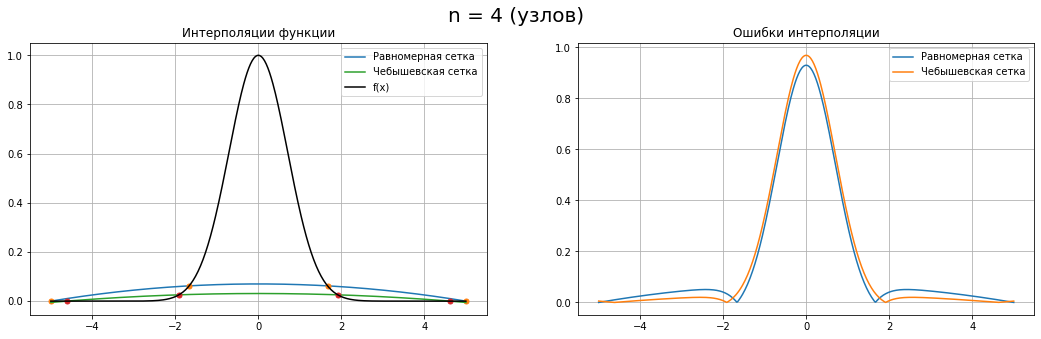

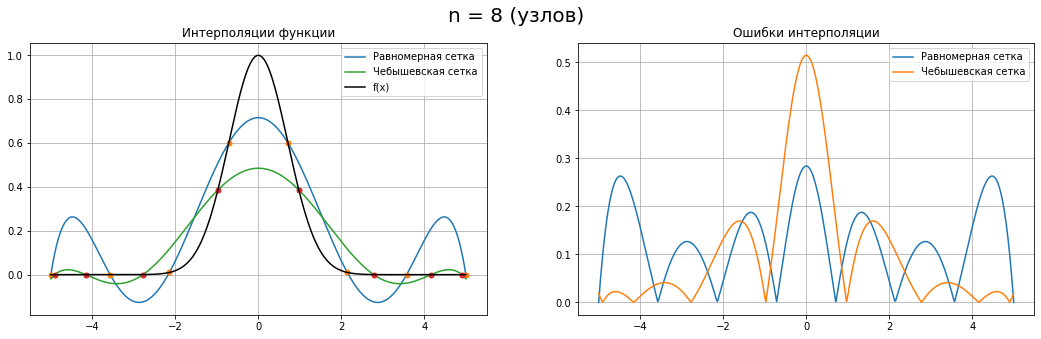

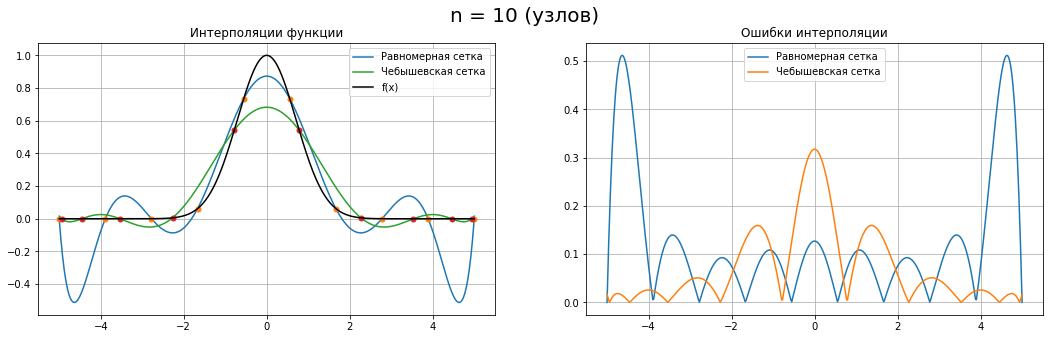

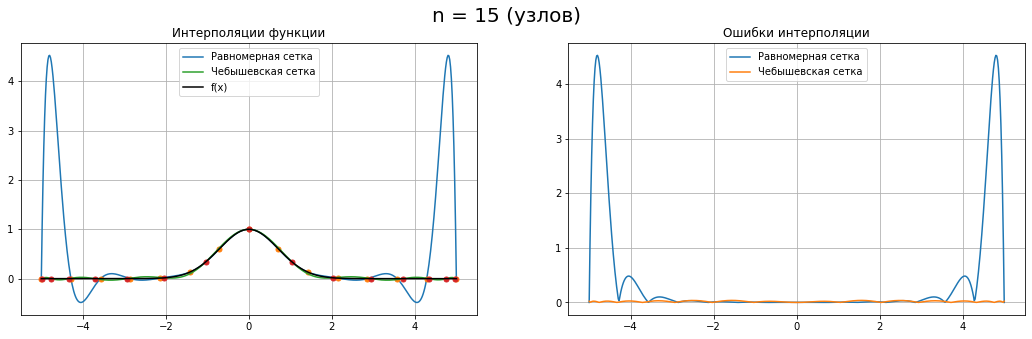

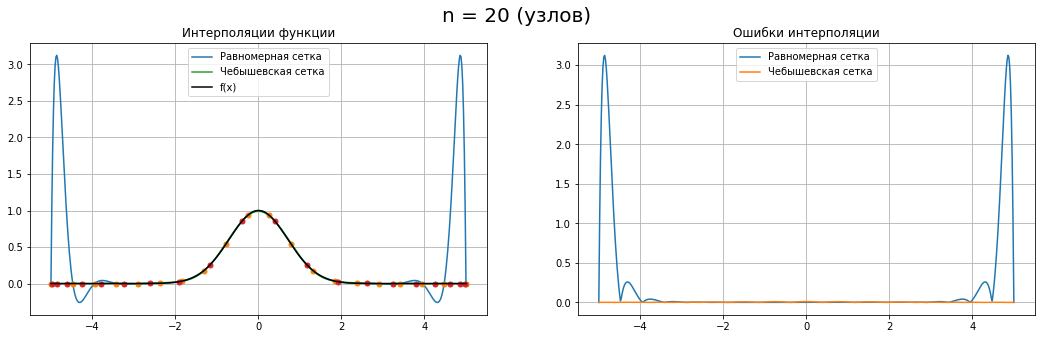

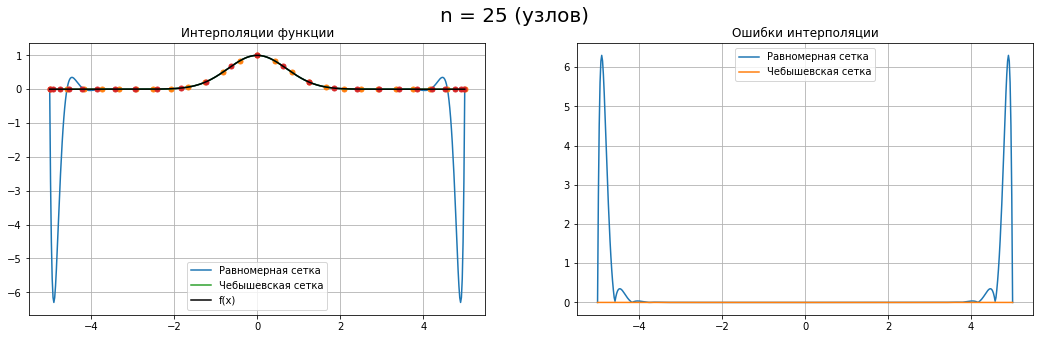

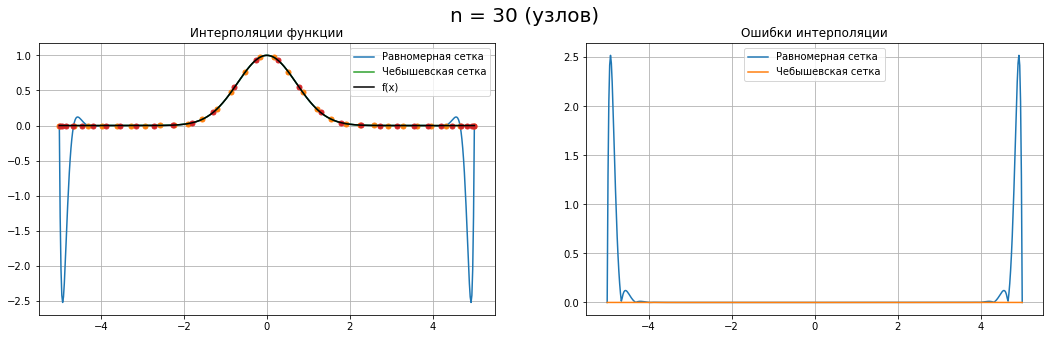

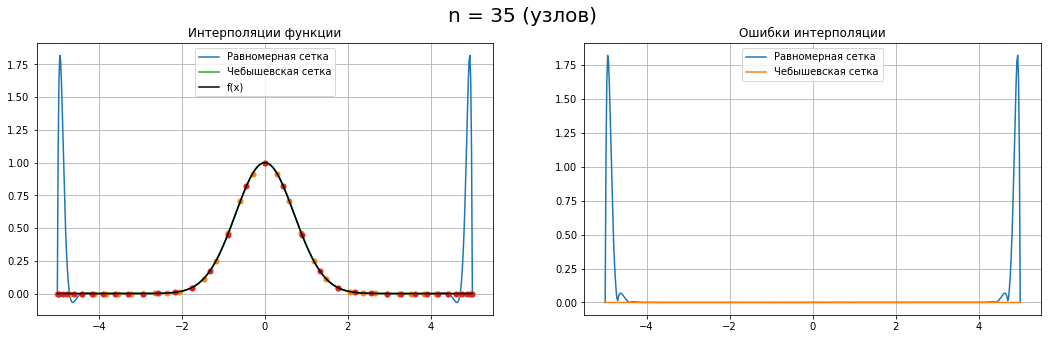

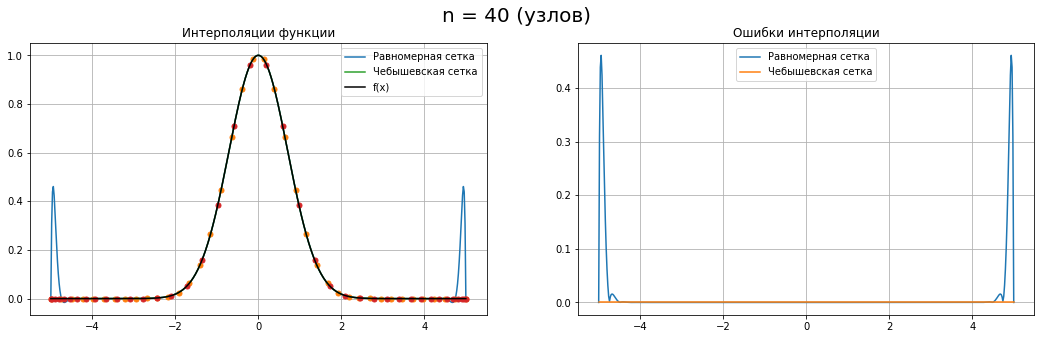

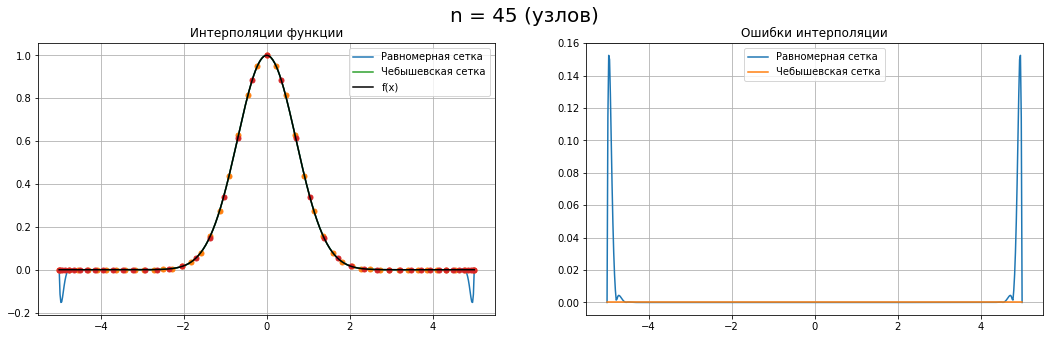

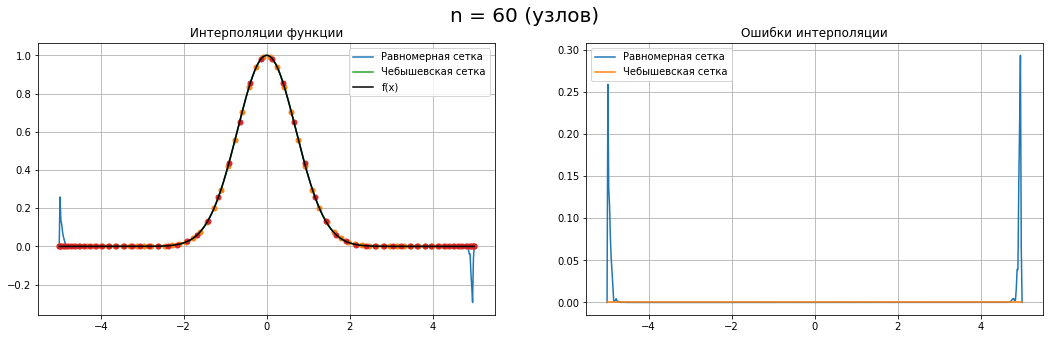

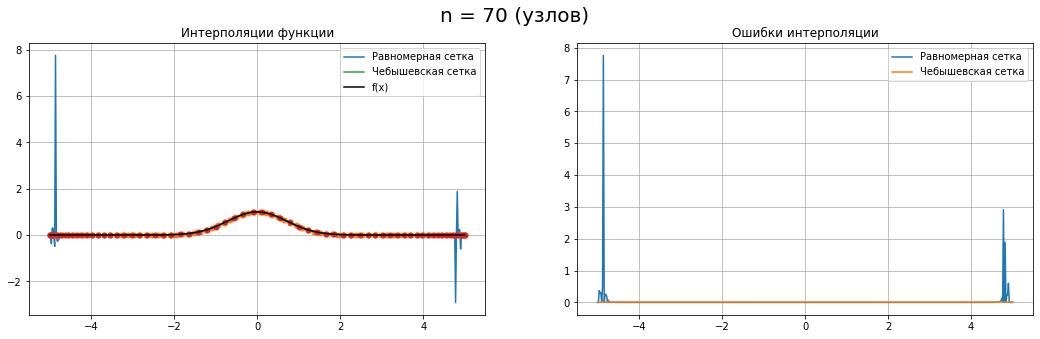

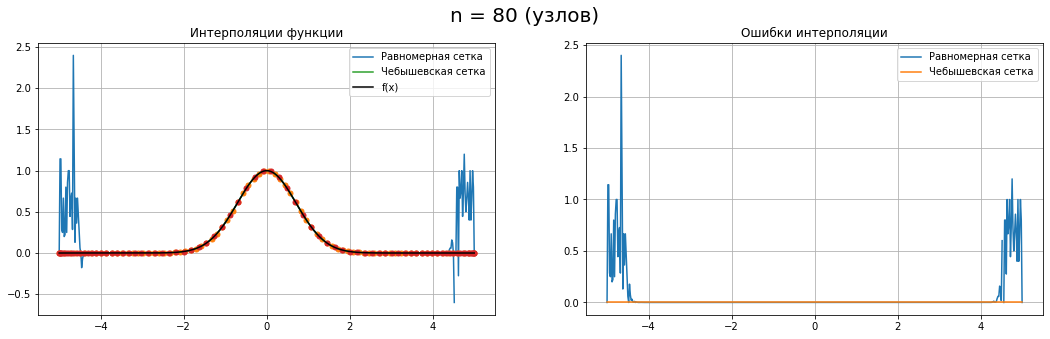

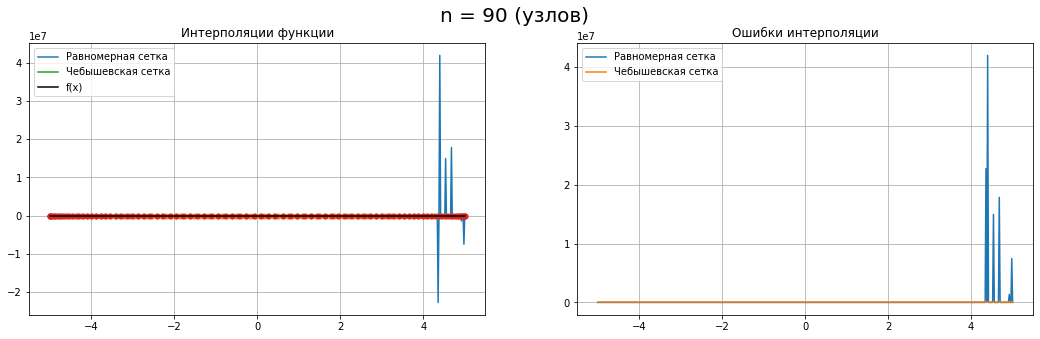

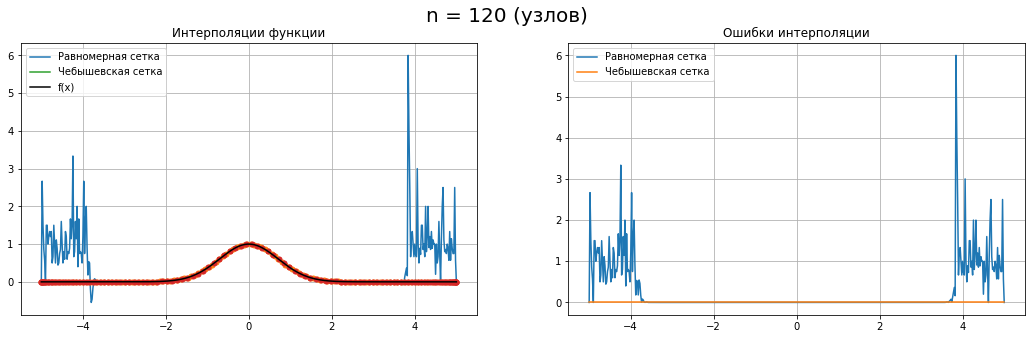

In [30]:
def f1(x):
    return np.exp(-x**2)
#Функция Рунге: 
def f2(x):
    return 1/(25 * x**2 + 1)

n = 5 #число узлов
f = f1 #выбор интерполируемой функции
for n in [4, 8, 10, 15, 20, 25, 30, 35, 40, 45, 60, 70, 80, 90, 120]:
    #Можно заменить флаг True на False, тогда не будет строиться
    #равномерная сетка, и можно будет увидеть величину ошибки в Чебышевской сетке
    #Также можно исследовать влияние длины мантиссы, выбрав np.single(float) или np.double
    interpolation(f, n, bord = [-5, 5], uniform = True, dt = np.double)

Как видно, для функции Рунге интерполяция с Чебышевской сеткой сходится медленно (несмотря на то, что при n = 90 на другой функции, равной $ e^{-x^2}$ достигается машинная точность), а интерполяция с равномерной сеткой вообще расходится на краях. Это объясняется особенностями функции Рунге: её полюса в комплексной плоскости расположены очень близко к нулю 

### Зададим теперь отрезок интерполяции  [a=0,b=+5] и повторим вычисления функции Рунге.


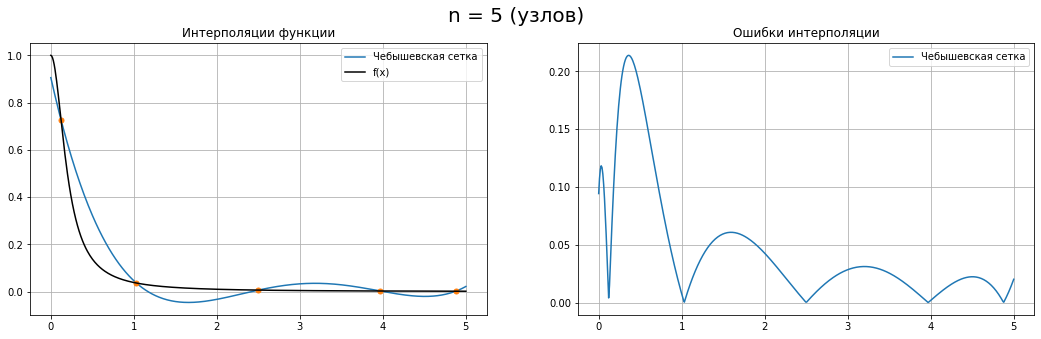

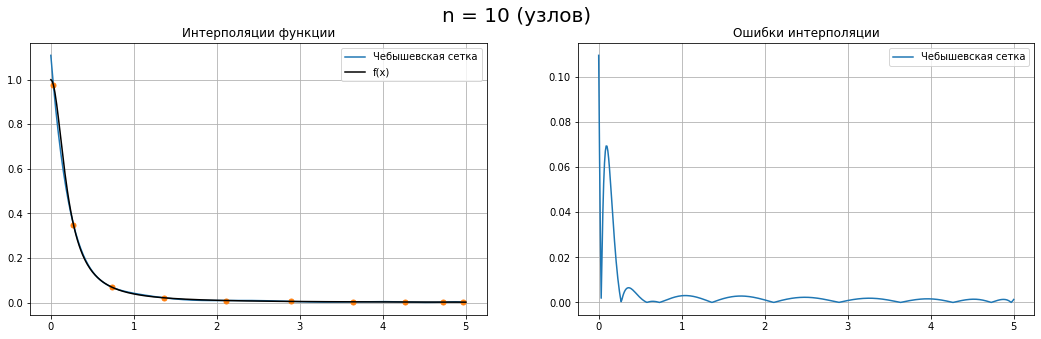

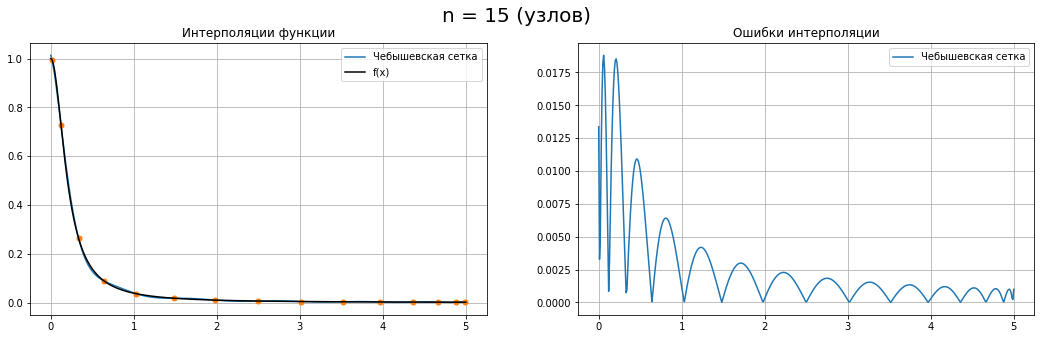

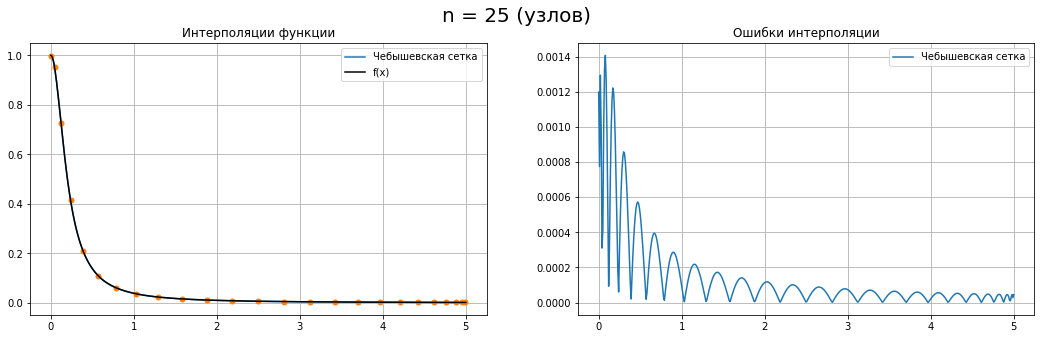

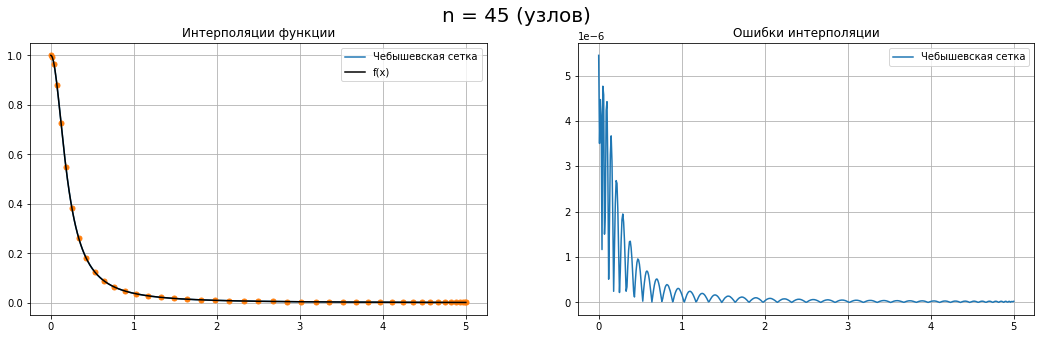

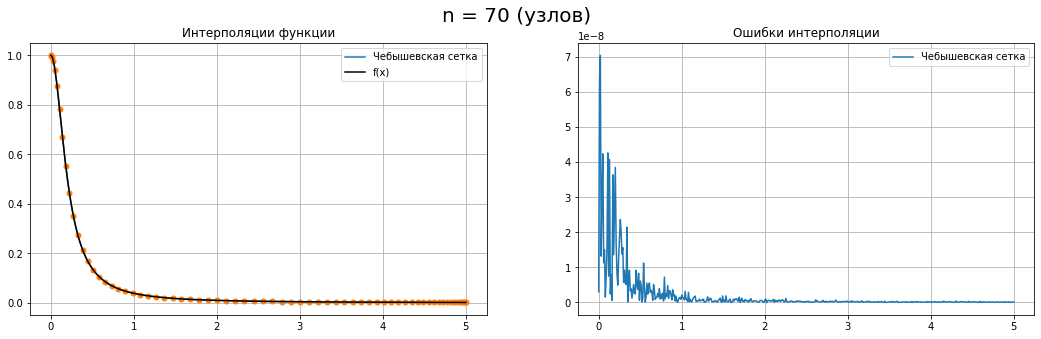

In [135]:
def f1(x):
    return np.exp(-x**2)

#Функция Рунге: 
def f2(x):
    return 1/(25 * x**2 + 1)

n = 5 #число узлов
f = f2 #выбор интерполируемой функции
for n in [5, 10, 15, 25, 45, 70]:
    #Можно заменить флаг True на False, тогда не будет строиться
    #равномерная сетка, и можно будет увидеть величину ошибки в Чебышевской сетке
    #Также можно исследовать влияние длины мантиссы, выбрав np.single(float) или np.double
    interpolation(f, n, bord = [0, 5], uniform = False, dt = np.single)

Как видим, сходимость стала намного лучше. 


### Левую границу сдвинем влево (a=-0.2, b=5)

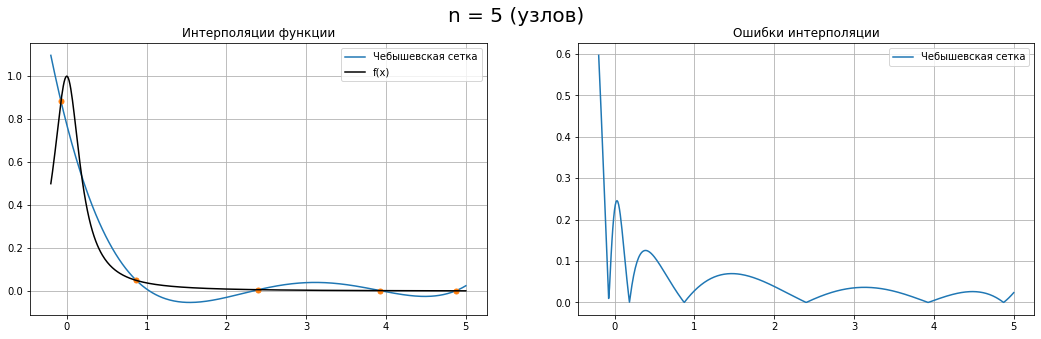

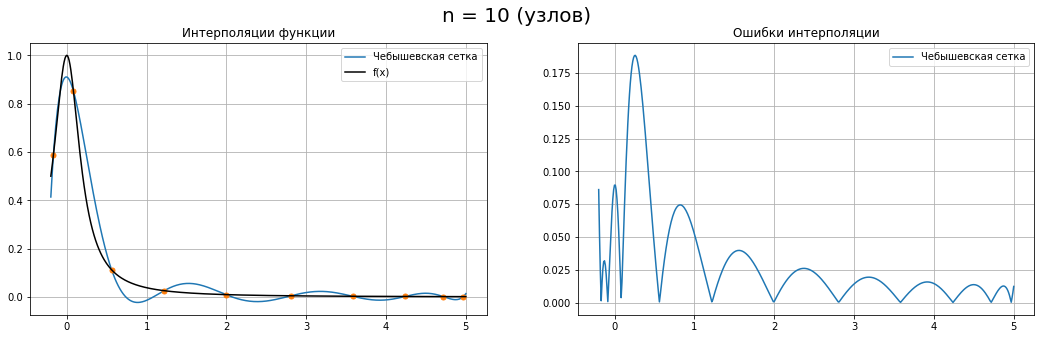

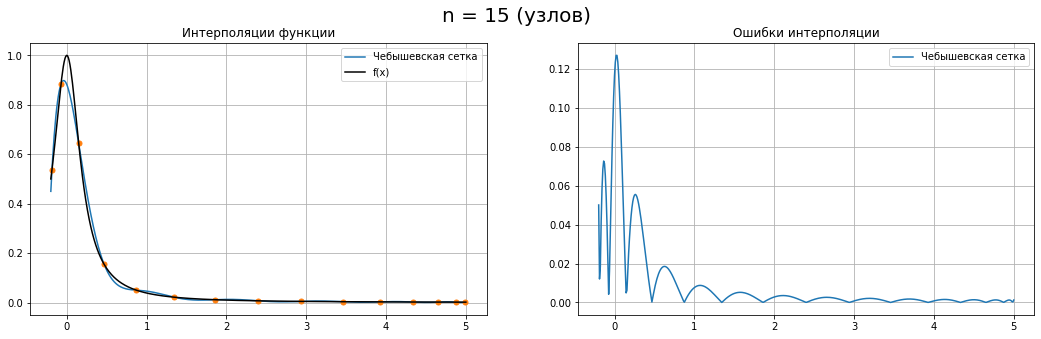

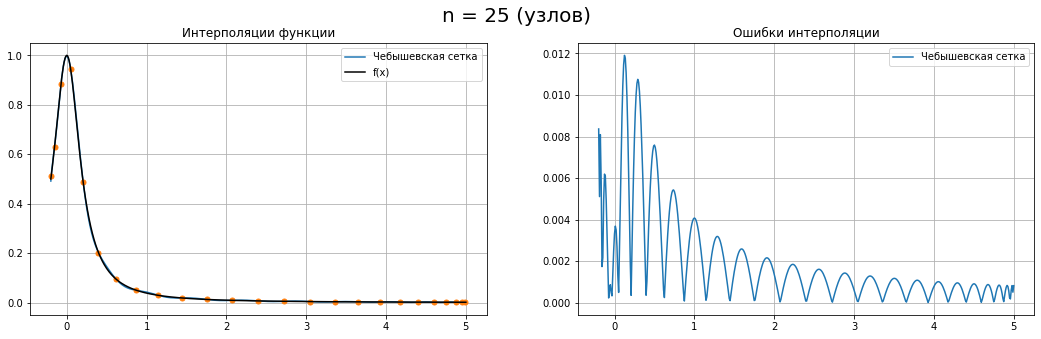

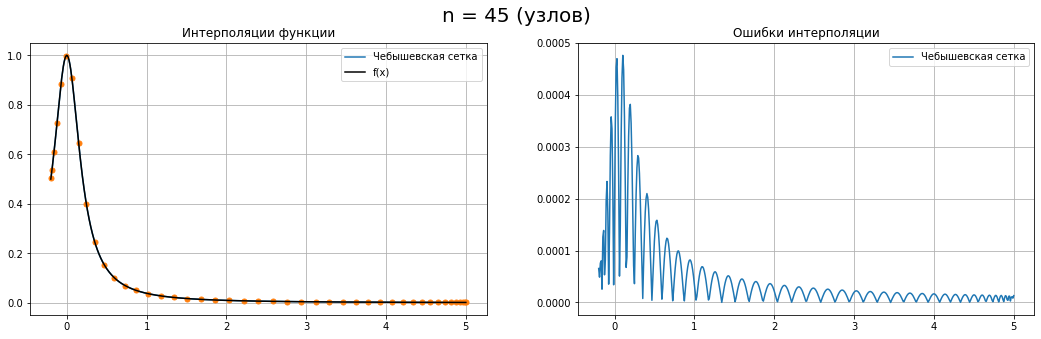

In [23]:
def f1(x):
    return np.exp(-x**2)

#Функция Рунге: 
def f2(x):
    return 1/(25 * x**2 + 1)

n = 5 #число узлов
f = f2 #выбор интерполируемой функции
for n in [5, 10, 15, 25, 45]:
    #Можно заменить флаг True на False, тогда не будет строиться
    #равномерная сетка, и можно будет увидеть величину ошибки в Чебышевской сетке
    #Также можно исследовать влияние длины мантиссы, выбрав np.single(float) или np.double
    interpolation(f, n, bord = [-0.2, 5], uniform = False, dt = np.single)

Видно, что сходимость заметно испортилась. Это связано с тем, что функция Рунге имеет полюс в точке (0, +-0.2i) комплексной плоскости - то есть приближаясь к числу -0.2, портится сходимость

### Исследуем влияние ограниченной точности представления данных исходной таблицы

Задав разные типы данных - float и double, получили, что максимальная точность интерполяции (увеличивая число узлов) для Чебышевской сетки сводится к погрешности, связанной с вычислительным пределом, и составлят $ \epsilon_{mash} $

Для равномерной же сетки метод может расходиться. Несмотря на это, минимальная погрешность (то есть в точках, далёких от края области интерполяции) также составляет порядка $ \epsilon_{mash} $ - сравнивается с вычислительной